<a href="https://colab.research.google.com/github/Danieljuarez-cmd/Investigaci-n-de-Operaciones-/blob/main/Cadenas_de_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Probabilidades del tablero de colores***

---

Juárez Parangueo Edgar Daniel

---

## **Planteamiento del problema**

Supongamos que tenemos un tablero circular con cuatro sectores, como se muestra a continuación:  
- Naranja  
- Azul  
- Verde  
- Rojo  



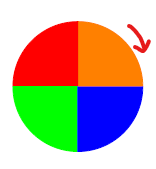


Se lanzan **dos monedas** y se avanza en sentido horario el número de **caras** que aparezcan, si al repetir el procedimineto....

> ¿Serán todos los sectores igual de probables cuando pase mucho tiempo?

---

##  **Modelo de transición**

Obtenemos la **matriz de transición** aplicando el teorema de la probabilidad total.

La **variable de estado** es la posición de la ficha:**verde, naranja, azul, rojo.**

Las posibles salidas de las monedas son las siguientes:

$CC, CX, XC, XX \Rightarrow$ todas con probabilidad  $\frac{1}{4}$


Denotamos lo siguiente para la matriz de transición:

* $x_n$: probabilidad del sector naranja tras $n$ lanzamientos.
* $y_n$: probabilidad del sector azul tras $n$ lanzamientos.
* $z_n$: probabilidad del sector verde tras $n$ lanzamientos.
* $t_n$: probabilidad del sector rojo tras $n$ lanzamientos.


### Ecuaciones de transición basadas en el teorema de la probabilidad total

$
P(A) = P(A \mid B_1)P(B_1) + P(A \mid B_2)P(B_2) + \dots + P(A \mid B_n)P(B_n)
$

Expresiones obtenidas a partir del Teore ma anterior:

1. $x_1:$ probabilidad de estar en naranja tras un paso
   * $x_1 = \frac{1}{4}x_0 + 0 \cdot y_0 + \frac{1}{4}z_0 + \frac{1}{2}t_0$

2. $y_1:$ probabilidad de estar en azul tras un paso
  * $y_1 = \frac{1}{2}x_0 + \frac{1}{4}y_0 + 0 \cdot z_0 + \frac{1}{4}t_0$

3. $z_1:$ probabilidad de estar en verde tras un paso
  * $z_1 = \frac{1}{4}x_0 + \frac{1}{2}y_0 +\frac{1}{4}z_0 + 0 \cdot t_0$

4. $t_1:$ probabilidad de estar en rojo tras un paso
  * $t_1 = 0 \cdot x_0 + \frac{1}{4}y_0 + \frac{1}{2}z_0 + \frac{1}{4}t_0$

Construimos la matriz dse transición:

$$
\begin{pmatrix}
x_n \\
y_n \\
z_n \\
t_n
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4}
\end{pmatrix}
\begin{pmatrix}
x_{n-1} \\
y_{n-1} \\
z_{n-1} \\
t_{n-1}
\end{pmatrix}
$$

Con:

$$
\mathbf{x}_n = A \mathbf{x}_{n-1}
\quad \Rightarrow \quad
\mathbf{x}_n = A^n \mathbf{x}_0
$$

Para resolver el problema debemos calcular $( A^n ).$, para obtener los valores de \(x_n, y_n, z_n, t_n\) a lo largo de varios pasos y observar si se estabilizan.

In [4]:
# Cálculo de probabilidades Xn, Yn, Zn, Tn
import numpy as np
import matplotlib.pyplot as plt

# Definimos la matriz de transición A como anteriormente.
A = np.array([
    [1/4, 0,   1/4, 2/4],
    [1/2, 1/4, 0,   1/4],
    [1/4, 1/2, 1/4, 0],
    [0,   1/4, 1/2, 1/4]
])

# Comenzamos con x0 = [x0, y0, z0, t0]
x0 = np.array([1, 0, 0, 0])

# n pasos
n = 50

# Creamos una matriz para guardar el cambio de las probabilidades durante el tiempo
probabilidades = np.zeros((n, 4))
probabilidades[0, :] = x0

# Calculamos x_n = A^n * x_0 de manera iterativa
for i in range(1, n):
    probabilidades[i, :] = A @ probabilidades[i-1, :]

# Imprimimos los valores
x_n, y_n, z_n, t_n = probabilidades[-1]
print("Probabilidades aproximadas:")
print(f"x_n (Naranja): {x_n:.4f}")
print(f"y_n (Azul):    {y_n:.4f}")
print(f"z_n (Verde):   {z_n:.4f}")
print(f"t_n (Rojo):    {t_n:.4f}")

Probabilidades aproximadas:
x_n (Naranja): 0.2500
y_n (Azul):    0.2500
z_n (Verde):   0.2500
t_n (Rojo):    0.2500


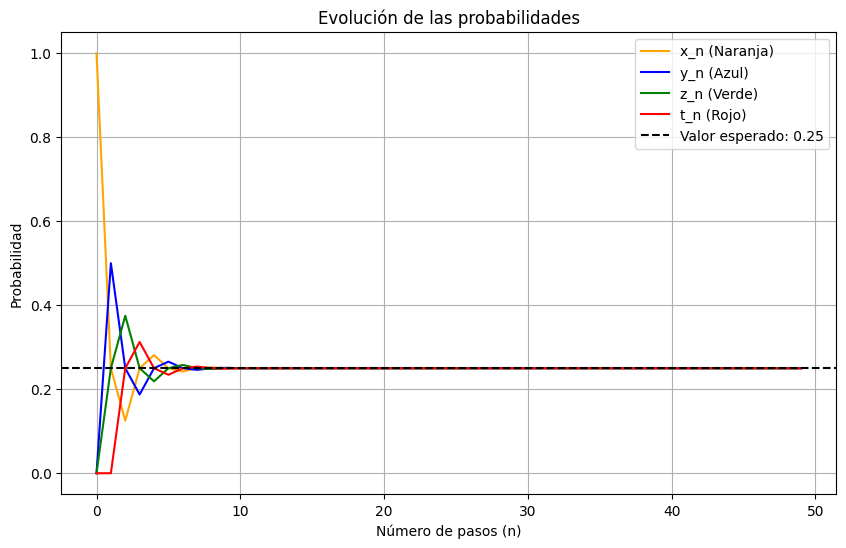

In [5]:
#Graficamos la evolución respecto al tiempo de las probabilidades

plt.figure(figsize=(10,6))
plt.plot(probabilidades[:,0], label='x_n (Naranja)', color='orange')
plt.plot(probabilidades[:,1], label='y_n (Azul)', color='blue')
plt.plot(probabilidades[:,2], label='z_n (Verde)', color='green')
plt.plot(probabilidades[:,3], label='t_n (Rojo)', color='red')
plt.axhline(0.25, color='black', linestyle='--', label='Valor esperado: 0.25')
plt.title("Evolución de las probabilidades")
plt.xlabel("Número de pasos (n)")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

Todos los sectores son igual de probables cuando pasa mucho tiempo:

$$
\boxed{
x_n ≈ y_n ≈ z_n ≈ t_n ≈ \frac{1}{4}
}
$$

Esto significa que, cuando el número de lanzamientos aumenta,
todos los sectores son igualmente probables.

Así el sistema alcanza una **distribución estacionaria uniforme**.